<h1>Kostenfunktion - Gradientenabstieg</h1>

Loss oder auch Kostenfunkton ist ein sehr wichtiger Bestandteil, wenn es um Deep-Learning und Maschine-Learning geht. Durch das Berechnen der Abweichung des Ergebnisses von der Wahrheit (y_predicted und y_true), kann festgestellt werden wie falsch die prediction ist.

Beim Trainieren soll diese Abweichung möglichst minimiert werden.

Um diese Abweichung zu berechnen gibt es verschiedene Funktionen. Die Funktion MSE ist z. B. sehr bekannt. 

Es ist ein interessantes Thema, für das es auch viele gute Artikel zum Nachlesen gibt.

<i>Abb1</i>: Eingabe der Features in ein einziges Neuron. Jedes Neuron hat 2 Komponente.

<img src="./img/nn_1.PNG" width=600 hight=400>

Das Netz startet mit einer bestimmten Initialisierung der Gewichte, wie in der Abbildung 1 zusehen ist. Diese können mit 1 starten, oder mit jeder anderen beliebigen Zahl. Bias wird oft mit 0 initialisiert. In der Erstes Epoche (oder Batch) performt das Netz sehr schlecht, erst nach der Erfassung des Fehlers und deren Reduzierung durch das Finden des Minimums, verbessert sich die Genauigkeit durch das Anpassen dieser Gewichte.  


<i>Abb2</i>: MSE und MAE.

<img src="./img/nn_5.PNG" width=600 hight=700>

MSE ist z. B. nützlich, wenn es negative Werte gibt.

Es gibt viele Kostenfunktionen für verschiedene Einsätze. Frameworks wie Tensorflow bieten eine gute Übersicht der verfügbaren Kostenfunktionen, die während des Trainings genutzt werden können.
>https://www.tensorflow.org/api_docs/python/tf/keras/losses [Letzter Zugriff: 24.06.2024]


Wie auch bei den Aktivierungsfunktionen können diese einfach in Python umgesetzt werden, wenn man der Formel folgt.

Einige dieser Kostenfunktionen haben Parameter die eingestellt werden könne. Die Funktion Log-Loss, auch genannt Binary-Crossentropy, hat solche Parameter

> https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy [Letzter Zugriff: 24.06.2024]

Der Einsatz von Log-Loss findet Platz bei Klassifizierungsproblemen, wo der Output des Netzes eine Wahrscheinlichkeit für eine Klasse ist. 
Dabei befinden sich die Werte zwichen 0 und 1 (Output ist Binär). Bei Multiclass-Klassifizierungen und der Aktivierungsfunktion Softmax wird Log-Loss ebenfalls eingesetzt.  

Die Formel für Log-Loss ist (Binär): <br>

$
- \frac{1}{n} \ \sum_{i=0}^{n} y_i \log(\hat{y}_i) + (1 - y_i) * log(1 - \hat{y}_i)
$

Basierend auf der Funktion soll der Fehler minimiert werden.

<h2>Kostenfunktion als Code</h2>

In [1]:
import numpy as np
import math 

In [2]:
y_true = [1, 0, 1, 0, 1]
y_pred = [0.5, 0.3, 0.7, 0.2, 0.8]

In [3]:
# Mit Numpy einfach umsetzbar. 
def MSE_1(y_pred:np.array, y_true:np.array):
    return np.mean( np.square(y_pred - y_true) )

# Ohne Numpy
def MSE_2(y_pred, y_true):
    tot_error = 0

    for yp, yt in zip(y_pred, y_true):
        tot_error = tot_error + (float(yt) - yp)**2

    return (1 / len(y_pred)) * tot_error


# Log-Loss:
# - Mit Numpy
def logloss(y_pred, y_true):
    # Weil log(0) nicht definiert ist => Wert nah bei 0 nehmen.
    eps = 1e-15
    y_pred = [max(i, eps)    for i in y_pred ]
    y_pred = [min(i, 1-eps)  for i in y_pred ]
    y_pred = np.array(y_pred)

    return -np.mean(\
        y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_pred ) )

In [4]:
MSE_1(np.array(y_true), np.array(y_pred))

0.10200000000000001

In [5]:
MSE_2(y_true, y_pred)

0.10200000000000001

In [6]:
logloss(np.array(y_pred), np.array(y_true))

0.37055683421316593

<h1>Gradientenabstieg</h1>

Gradientenabstieg ist einer der wichtigsten und elementaren Konzepte in DL, um überhaupt das Model zu optimieren. Durch den Abstieg Richtung Minimum soll der Gesamtfehler minimiert und die Weights optimiert werden.

<i>Abb3</i>: Finde die Parameter.

<img src="./img/nn_6.PNG" width=400 hight=300>

In einem Netzwerk wollen wir die richtigen Parameter finden, als die w's und b's. 

In der Abbildung 3 sehen wir zwei einfache Tabelle, was sind aber die Parameter?

In der Tabelle 1: <br>
$
y = X * w1 + b \ = \ X * 2 + 0
$

Es ist einfach zu erkennen.

Was ist mit der Tabelle 2? Durch direktes Hinschauen geht das nicht, besonders nicht, wenn es sehr viele Parameter gibt.

Durch das Gradientenverfahren können die Parameter gefunden werden => w1 = 0.34 und b = -0.7

<i>Abb4</i>: Epoche und total-error (Beispielhaft).

<img src="./img/nn_7.PNG" width=600 hight=300>

Während des Forwardpasses werden die einzelnen Samples dem Netzwerk übergeben, Stück für Stück. Nach jedem Sample wird der Fehler mit einer bestimmten Kostenfunktion, z. B. Log-Loss, berechnet. <br>
Am Ende wird der Total-Error berechnet, was uns als Loss angezeigt wird, z. B. als Log-Loss.

Durch Backpropagation sollen die Parameter mit dem gegebenen Fehler angepasst werden. Es sind mehrere Epochen nötig, um Log-Loss zu reduzieren und um die passenden Weights zu finden.

Das ändert/update der Weights sieht so aussehen:<br>
$
w1 = w1 - Schrittweite * PartielleAbleitung_w1
$

Jetzt werden die <b>Ableitungen</b> der Funktionen wichtig. Um die Steigung an einem Punkt zu bekommen, wird die Ableitung der Funktion benötigt. Der Punkt wird dann in die Ableitung eingesetzt und herauskommt die Steigung. <br>
=> Wie ändert sich der Gesamt-Loss bei einer veränderung eines w's.

Dabei wird die Schrittweite richtung Minimum auch als Learning-rate oder lr bezeichnet. 
- Bei großen Schritten könnte das Minimum überschritten werden => man kommt nie ans Ziel und spring immer umher.
- Bei einem zu kleinen Wert dauert es lange, bis das Minimum erreicht ist.

Für die anderen w's und das b ist das Vorgehen gleich.

Deswegen ist es wichtig, sich mit der Thematik auseinander zusetzen.

Nach der Anpassung der Weights, wird der Vorgang fortgeführt bis das gewünschte Ergebnis da ist, z. B. wenn Loss sehr niedrig ist oder sich die w's nicht mehr stark verändern. 

<h2>Code</h2>

Als Versuchsbeispiel nehmen wir ein kleines Dataset wo es darum geht eine Versicherung abzuschließen.

In [67]:
# Imports.
import tensorflow as tf
import pandas as pd
import random
import matplotlib.pyplot as plt

In [8]:
# Lade Dataset
data_df = pd.read_csv('./data/data.csv')
data_df['age'] = data_df['age'] / 100
data_df

,age,affordibility,bought_insurance
0,0.22,1,0
1,0.25,0,0
2,0.47,1,1
3,0.52,0,0
4,0.46,1,1
5,0.56,1,1
6,0.55,0,0
7,0.60,0,1
8,0.62,1,1
9,0.61,1,1


Durch ein überschaubares Dataset und ein kleines Netz kann das Verfahren einfach implementiert werden.

Wir haben 2 Neuronen als Input und 1 Neuron als Output. 

Als Erstes probieren wir es mit Keras aus und lassen uns die Weigts ausgeben.

In [10]:
# Model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(2,), \
                          kernel_initializer='ones', bias_initializer='zeros', activation='sigmoid', name="L1a2")
])
model.compile(
    optimizer='adam',
    loss     ='binary_crossentropy', # Log-Loss
    metrics  = ['accuracy']
)

In [9]:
X = data_df.drop(['bought_insurance'], axis='columns')
y = data_df['bought_insurance']

In [57]:
model.fit(X.to_numpy(), y.to_numpy(), epochs=2500)

Epoch 1/2500
1/1 [==============================] - 0s 8ms/step - loss: 0.5668 - accuracy: 0.7143
Epoch 2/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7143
Epoch 3/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7143
Epoch 4/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7143
Epoch 5/2500
1/1 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.7143
Epoch 6/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7143
Epoch 7/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7143
Epoch 8/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7143
Epoch 9/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7143
Epoch 10/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7143
Epoch 11/2500
1/1 [

Nach dem Training (anpassen der w's und b's) haben sich die Gewichte verändert. <br>
Das Model kann alle Weights ausgeben.

In [58]:
model.get_layer('L1a2').get_weights()

[array([[4.2917147],
        [1.2697676]], dtype=float32),
 array([-2.4975893], dtype=float32)]

In [59]:
coef, b = model.get_layer('L1a2').get_weights()
coef

array([[4.2917147],
       [1.2697676]], dtype=float32)

In [15]:
model.predict([ [0.22, 1] ])

1/1 [==============================] - 0s 70ms/step


array([[0.54037255]], dtype=float32)

In [18]:
# Aktivierungsfunktion. 
def sidmoid(x):
    return 1 / (1 + math.exp(-x))

In [19]:
# Mit den gebenen Weights:
res = 1.749332 * 0.22 + 0.76867884 * 1 + (-0.9916893)
sidmoid(res)

0.5403725601709111

In [22]:
np.array(model.predict([ [0.22, 1] ])) == sidmoid(res)

1/1 [==============================] - 0s 47ms/step


array([[ True]])

Man sieht deutlich, dass die Ergebnisse gleich sind. <br>
Bei internen Unterschieden kann es vorkommen, dass sich das Ergebnis minimal unterscheidet.

<h2>Python-NN</h2>

Mit diesem Wissen und zusätzlich mit dem Gradientenabstieg kann einfach ein neurales Netz in Python programmiert werden.

Quellen zum Nachlesen:
> Understanding the Mathematics behind Gradient Descent: https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e [Letzter Zugriff: 24.06.2024]

> Gradient descent: https://en.wikipedia.org/wiki/Gradient_descent [Letzter Zugriff: 24.06.2024]

> Logistic regression for binary classification with Core APIs: https://www.tensorflow.org/guide/core/logistic_regression_core [Letzter Zugriff: 24.06.2024]

Dank Numpy's Matrixmultiplikationen können wir uns hier viel Arbeit sparen.

In [12]:
# Gradienabstieg.
# - Für w1, w2 und b.
def gradienten_abstieg(age, afford, y_true, epochs, loss_thr:float=2.0, lr:float=0.01):
    # w1, 2w und Bais.
    # - age, affordibility, y_true sind Vektoren.
    w1   = w2 = 1  # Random, meist mit 1. 
    bias = 0  # Meist mit 0 
    n = len(afford)  # Länge der Samples.

    for i in range(epochs): # Für jede Epoche mach das:
        # Weight-Sum. Siehe Abbildung 1 oben. 
        # - Jedes Neuron hat 2 Komponenten- Summe und Aktivierungsfunktion. 
        weight_sum = w1 * age + w2 * afford + bias  # Vektor Operation.
        y_pred = sigmoid_funk(weight_sum)  # Aktivierungsfunktion.
        
        # Berechne Loss, hier Log-Loss
        # - Oben definiert. 
        loss = logloss(y_pred, y_true)

        # Dann nutzen wir die Ableitung. 
        # - Vereinfachte Ableitung. 
        # - Oder als Schleife.
        w1d =  (1/n) * np.dot(np.transpose(age) ,    (y_pred-y_true))           
        w2d =  (1/n) * np.dot(np.transpose(afford) , (y_pred-y_true)) 
        bias_d = np.mean(y_pred-y_true)

        w1 = w1 - lr * w1d  # Formel von Oben.
        w2 = w2 - lr * w2d  # - Hier werden die Gewichte angepasst - Die ganze Magie dahinter. 
        bias = bias - lr * bias_d

        # Wie bei TF wollen wir auch Ausgaben sehen.
        print(f"epoche: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}")

        if loss <= loss_thr:
            break
    return w1, w2, bias

def sigmoid_funk(x):
    return 1 / (1 + np.exp(-x))

In [13]:
gradienten_abstieg(X['age'], X['affordibility'], y.to_numpy(), epochs=2500, loss_thr=0.4, lr=0.5) 

epoche: 0, w1: 0.9762849575718682, w2: 0.9413816587881323, bias: -0.11723219144694776, loss: 0.71595572538616
epoche: 1, w1: 0.9585899606042918, w2: 0.8931885694836231, bias: -0.2191259515368365, loss: 0.6829875086265863
epoche: 2, w1: 0.9464149777228181, w2: 0.8547036125789471, bias: -0.30702265178471283, loss: 0.6589217086986395
epoche: 3, w1: 0.9391383692699615, w2: 0.8249187940412019, bias: -0.38253896783203234, loss: 0.6416822511323294
epoche: 4, w1: 0.9360948301666506, w2: 0.8026921496785079, bias: -0.4473753028623717, loss: 0.6294529652627155
epoche: 5, w1: 0.9366346644985458, w2: 0.7868725699850446, bias: -0.5031736709956828, loss: 0.6207751606893134
epoche: 6, w1: 0.9401607708239514, w2: 0.7763814668731136, bias: -0.5514315265930735, loss: 0.6145491275476828
epoche: 7, w1: 0.9461466946820075, w2: 0.7702560384753816, bias: -0.5934618343566833, loss: 0.6099834810303708
epoche: 8, w1: 0.954141456340729, w2: 0.7676648564070271, bias: -0.6303847592529248, loss: 0.6065276757013168
e

(7.000417174555437, 1.558151932884901, -3.8616522949724397)

Damit kann jetzt eine Klasse erstellt werden.

In [11]:
# Einfaches Netz
# - Angepasst für den Versuch.
class my_nn():
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias  = 0

    def predict(self, X):
        # Wie oben: Summe und dann Funktion anwenden.
        weight_sum = (self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias)  
        return sigmoid_funk(weight_sum)

    def fit(self, X, y, epochs):
        self.w1, self.w2, self.bias = self.gradienten_abstieg( X['age'], X['affordibility'], y, epochs)

        
    def gradienten_abstieg(self, age, afford, y_true, epochs, loss_thr:float=2.0, lr:float=0.01):
        w1   = w2 = 1  # Random, meist mit 1. 
        bias = 0  # Meist mit 0 
        n = len(afford) 
        for i in range(int(epochs)):   
            weight_sum = self.w1 * age + self.w2 * afford + self.bias  # Vektor Operation.
            y_pred = sigmoid_funk(weight_sum)  # Aktivierungsfunktion.
            loss = logloss(y_pred, y_true)
            w1d =  (1/n) * np.dot(np.transpose(age) ,    (y_pred-y_true))           
            w2d =  (1/n) * np.dot(np.transpose(afford) , (y_pred-y_true)) 
            bias_d = np.mean(y_pred-y_true)
            self.w1 = self.w1 - lr * w1d  # Formel von Oben.
            self.w2 = self.w2 - lr * w2d  # - Hier werden die Gewichte angepasst - Die ganze Magie dahinter. 
            self.bias = self.bias - lr *bias_d

            if i%100==0:
                print(f"epoche: {i}, w1: {self.w1}, w2: {self.w2}, bias: {self.bias}, loss: {loss}")
            
        return self.w1, self.w2, self.bias

In [90]:
my_mdoel = my_nn()
my_mdoel.fit(X, y, epochs=500)

epoche: 0, w1: 0.9995256991514374, w2: 0.9988276331757626, bias: -0.0023446438289389552, loss: 0.71595572538616
epoche: 100, w1: 0.9632313469977409, w2: 0.9008775541087021, bias: -0.20843013437288502, loss: 0.6619327284009086
epoche: 200, w1: 0.9463485553759833, w2: 0.8370701880535407, bias: -0.3652806910274291, loss: 0.632575560887126
epoche: 300, w1: 0.9444504004015485, w2: 0.7999211539363223, bias: -0.4842577485735926, loss: 0.6168202751035144
epoche: 400, w1: 0.9534266271505314, w2: 0.7820864281235341, bias: -0.5757101431428063, loss: 0.6079502711195035


<h1>Stochastik Gradient, Batch Gradient und Mini-Batch Gradient</h1>

Bei dem oberen Beispiel wurde alle Samples für das Training genutzt. Das war der Batch Gradientenabstieg.
Nachteil ist, dass bei einem großen Dataset vorher durch alle Samples iteriert werden muss, bevor die Anpassung der Weights erfolg, das kann lange dauern.


Bei dem stochastischen Gradientenabstieg (<b>SGD</b>) wird per Zufall ein Sample ausgewählt und dann Backpropagiert. Bei großen Datasets spart man Zeit, indem man jedes Sample nimmt und eine Anpassung durchführt, und nicht erst durch alle durchgeht. 

Bei dem Ansatz Mini-Batch Gradientenabstieg werden n-Batches genommen, die aus m-zufälligen Samples bestehen. Bei einem Dataset der Größe 100 und der Batch-Größe 20 gibt es 5 Batches die je aus 20 zufällig ausgewählten Samples bestehen. 

<i>Abb5</i>: Batch, Mini-Batch und stochastischen Gradientenabstieg.

<img src="./img/nn_8.PNG" width=700 hight=500>

In [61]:
# Log-Loss:
# - Mit Numpy, von Oben
def logloss(y_pred, y_true):
    # Weil log(0) nicht definiert ist => Wert nah bei 0 nehmen.
    eps = 1e-15
    y_pred2 = max(y_pred, eps)   
    y_pred2 = min(y_pred2, 1-eps) 
    y_pred2 = np.array(y_pred2)

    return -np.mean(\
        y_true * np.log(y_pred2) + (1-y_true) * np.log(1 - y_pred2 ) )

In [62]:
# SGD
# - Wähle zufälliges Sample und führe Anpassung durch. 
def stochastik_gradienten_abstieg(X, y_true, epochs, loss_thr:float=2.0, lr:float=0.01):
    w1   = w2 = 1   
    bias = 0 
    n = X.shape[0]  # Anzahl Einträge

    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, n-1)  # Ziehe Sample. 
        
        sample_x = X.iloc[random_index]  # Mit iloc auf Zeile zugreifen.
        sample_y = y_true[random_index]

        # Summe und Funktion
        weight_sum = w1 * sample_x['age'] + w2 * sample_x['affordibility'] + bias
        y_pred = sigmoid_funk(weight_sum)  # Aktivierungsfunktion. 

        loss = logloss(y_pred, sample_y)

        w1d =  (1/n) * np.dot(np.transpose(sample_x['age']) ,           (y_pred-sample_y))           
        w2d =  (1/n) * np.dot(np.transpose(sample_x['affordibility']) , (y_pred-sample_y)) 
        bias_d = np.mean(y_pred-y_true)

        w1 = w1 - lr * w1d 
        w2 = w2 - lr * w2d  
        bias = bias - lr * bias_d
        
        if i % 100 ==0:
            cost_list.append(loss)
            epoch_list.append(i)
    return w1, w2, bias, loss, cost_list, epoch_list


In [65]:
w1, w2, bias, loss, cost_list, epoch_list = stochastik_gradienten_abstieg(X, y, 2500, loss_thr=0.4, lr=0.5)   
w1, w2, bias

(2.7268264148118373, 1.4481113140464417, -1.9367194020479213)

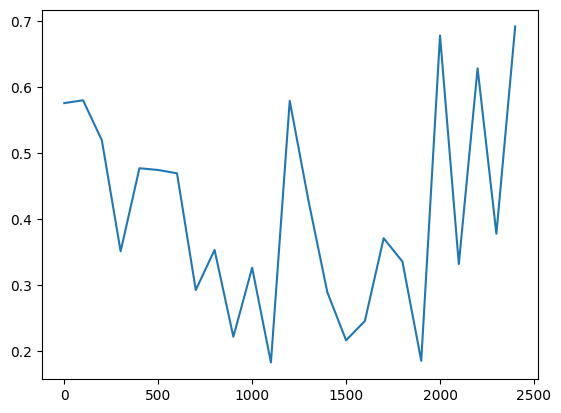

In [68]:
plt.plot(epoch_list, cost_list)

In [101]:
# Log-Loss:
# - Mit Numpy
def logloss(y_pred, y_true):
    # Weil log(0) nicht definiert ist => Wert nah bei 0 nehmen.
    eps = 1e-15
    y_pred = [max(i, eps)    for i in y_pred ]
    y_pred = [min(i, 1-eps)  for i in y_pred ]
    y_pred = np.array(y_pred)

    return -np.mean(\
        y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_pred ) )
    
# Mini-Batch Gradientenasbtieg. 
def mini_batch_gradienten_abstieg(X, y_true, epochs, batch_size:int=5, loss_thr:float=2.0, lr:float=0.01):
    w1   = w2 = 1   
    bias = 0 
    n = X.shape[0]  # Anzahl Einträge
    
    cost_list = []
    epoch_list = []

    # Wenn Batchgröße ist als n, dann nehme ganzes Dataset.
    if batch_size > n: 
        batch_size = n
        
    cost_list = []
    epoch_list = []

    # Anzahl der Batches.
    num_batches = int(n/batch_size)
    
    for i in range(epochs):  
        
        random_indices = np.random.permutation(n)  # Zufällige Ziehungenm. 
        X_samples = X.iloc[random_indices]      # X und y Ziehungen müssen mit dem Index passen. 
        y_samples = y_true[random_indices]
        
        for j in range(0, n ,batch_size):
            
            X_s = X_samples.iloc[j:j+batch_size]  # Batch mit Samples.
            y_s = y_samples[j:j+batch_size]  # Batch mit Samples.
            # Summe und Aktivierungsfunktion.
            weight_sum = w1 * X_s['age'] + w2 * X_s['affordibility'] + bias
            y_pred = sigmoid_funk(weight_sum)

            loss = logloss(y_pred, y_s)
                 
            w1d =  (1/n) * np.dot(np.transpose(X_s['age']) ,           (y_pred-y_s))           
            w2d =  (1/n) * np.dot(np.transpose(X_s['affordibility']) , (y_pred-y_s)) 
            bias_d = np.mean(y_pred-y_s)

            w1 = w1 - lr * w1d 
            w2 = w2 - lr * w2d  
            bias = bias - lr * bias_d
                
        if i%100==0:
            cost_list.append(loss)
            epoch_list.append(i)
            print(f'loss: {loss}')
        
    return w1, w2, bias, loss, cost_list, epoch_list


In [102]:
w1, w2, bias, loss, cost_list, epoch_list = mini_batch_gradienten_abstieg(X, y, 1000, batch_size=2, loss_thr=0.4, lr=0.3)   
w1, w2, bias

loss: 0.5976384799472111
loss: 0.5183918244159663
loss: 0.3636452023374849
loss: 0.34279837859761964
loss: 0.5041858669270558
loss: 0.23461356552691118
loss: 0.41957635194558673
loss: 0.37672537877297446
loss: 0.25204866605488685
loss: 0.28402623454812936


(8.065675382863366, 1.7365325969241994, -4.49145830736558)

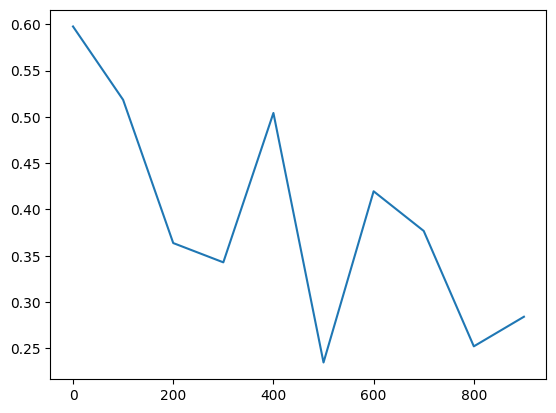

In [103]:
plt.plot(epoch_list, cost_list)